In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import os

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

import tigramite
import tigramite.data_processing as pp
import tigramite.plotting as tp

from tigramite.models import LinearMediation, Models
from tigramite.causal_effects import CausalEffects

# Function to remove seasonal mean and divide by seasonal standard deviation
def anomalize(dataseries, divide_by_std=True, reference_bounds = None, cycle_length=12, return_cycle=False):
    if reference_bounds is None:
        reference_bounds = (0, len(dataseries))

    anomaly = np.copy(dataseries)
    for t in range(cycle_length):
        if return_cycle:
            anomaly[t::cycle_length] = dataseries[t+reference_bounds[0]:reference_bounds[1]:cycle_length].mean(axis=0)
        else:
            anomaly[t::cycle_length] -= dataseries[t+reference_bounds[0]:reference_bounds[1]:cycle_length].mean(axis=0)
            if divide_by_std:
                anomaly[t::cycle_length] /= dataseries[t+reference_bounds[0]:reference_bounds[1]:cycle_length].std(axis=0)
    return anomaly

In [9]:
cd

/Users/alondraalvarez


In [10]:
cd Desktop/REU 2025

/Users/alondraalvarez/Desktop/REU 2025


In [47]:
var_names = ['Precipitation','Temperature', "Specific Humidity"]

path = "M1_data/"
site="M1"

# Load the climate time series
data = pd.read_csv(path + f"{site}_30_min_meteorological_data.csv")

data['time'] = pd.to_datetime(data['time'])

datatime = pd.to_datetime(data['time'])

# Set index and resample to 1-minute grid
data.set_index('time', inplace=True)
resampled = data.resample('1min').mean()

# Optionally drop some columns and clean
numeric = resampled[['precipitation', 'temperature', 'specific_humidity']]

data_array = numeric.to_numpy()

T, N = data_array.shape


# Create mask: True where data is missing
mask = np.isnan(data_array)

# Replace NaNs in the data with a placeholder (Tigramite default: 999999)
data_array[np.isnan(data_array)] = 999999

# Create Tigramite DataFrame
dataframe = pp.DataFrame(data_array,
                            mask=mask,
                            var_names=var_names,
                            missing_flag=999999)

# Then call time_bin_with_mask
#############################################################################################################


In [48]:
data_array_binned, _ = pp.time_bin_with_mask(data_array, time_bin_length=2, mask=None)


In [14]:
# # Time-bin data and datatime
# data_array, _ = pp.time_bin_with_mask(data,
#     time_bin_length=2, mask=None)
# datatime, _ = pp.time_bin_with_mask(datatime,
#     time_bin_length=2, mask=None)

/opt/anaconda3/lib/python3.11/site-packages/tigramite/data_processing.py:1251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values[np.isnan(values)] = 0.
/opt/anaconda3/lib/python3.11/site-packages/tigramite/data_processing.py:1251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values[np.isnan(values)] = 0.
/opt/anaconda3/lib/python3.11/site-packages/tigramite/data_processing.py:1251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

/opt/anaconda3/lib/python3.11/site-packages/tigramite/data_processing.py:1251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values[np.isnan(values)] = 0.
/opt/anaconda3/lib/python3.11/site-packages/tigramite/data_processing.py:1251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values[np.isnan(values)] = 0.
/opt/anaconda3/lib/python3.11/site-packages/tigramite/data_processing.py:1251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

/opt/anaconda3/lib/python3.11/site-packages/tigramite/data_processing.py:1251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values[np.isnan(values)] = 0.
/opt/anaconda3/lib/python3.11/site-packages/tigramite/data_processing.py:1251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values[np.isnan(values)] = 0.
/opt/anaconda3/lib/python3.11/site-packages/tigramite/data_processing.py:1251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

/opt/anaconda3/lib/python3.11/site-packages/tigramite/data_processing.py:1251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values[np.isnan(values)] = 0.
/opt/anaconda3/lib/python3.11/site-packages/tigramite/data_processing.py:1251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values[np.isnan(values)] = 0.
/opt/anaconda3/lib/python3.11/site-packages/tigramite/data_processing.py:1251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

/opt/anaconda3/lib/python3.11/site-packages/tigramite/data_processing.py:1251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values[np.isnan(values)] = 0.
/opt/anaconda3/lib/python3.11/site-packages/tigramite/data_processing.py:1251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values[np.isnan(values)] = 0.
/opt/anaconda3/lib/python3.11/site-packages/tigramite/data_processing.py:1251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

/opt/anaconda3/lib/python3.11/site-packages/tigramite/data_processing.py:1251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values[np.isnan(values)] = 0.
/opt/anaconda3/lib/python3.11/site-packages/tigramite/data_processing.py:1251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values[np.isnan(values)] = 0.
/opt/anaconda3/lib/python3.11/site-packages/tigramite/data_processing.py:1251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

/opt/anaconda3/lib/python3.11/site-packages/tigramite/data_processing.py:1251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values[np.isnan(values)] = 0.
/opt/anaconda3/lib/python3.11/site-packages/tigramite/data_processing.py:1251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values[np.isnan(values)] = 0.
/opt/anaconda3/lib/python3.11/site-packages/tigramite/data_processing.py:1251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

/opt/anaconda3/lib/python3.11/site-packages/tigramite/data_processing.py:1251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values[np.isnan(values)] = 0.
/opt/anaconda3/lib/python3.11/site-packages/tigramite/data_processing.py:1251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values[np.isnan(values)] = 0.
/opt/anaconda3/lib/python3.11/site-packages/tigramite/data_processing.py:1251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

/opt/anaconda3/lib/python3.11/site-packages/tigramite/data_processing.py:1251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values[np.isnan(values)] = 0.
/opt/anaconda3/lib/python3.11/site-packages/tigramite/data_processing.py:1251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values[np.isnan(values)] = 0.
/opt/anaconda3/lib/python3.11/site-packages/tigramite/data_processing.py:1251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

/opt/anaconda3/lib/python3.11/site-packages/tigramite/data_processing.py:1251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values[np.isnan(values)] = 0.
/opt/anaconda3/lib/python3.11/site-packages/tigramite/data_processing.py:1251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values[np.isnan(values)] = 0.
/opt/anaconda3/lib/python3.11/site-packages/tigramite/data_processing.py:1251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

/opt/anaconda3/lib/python3.11/site-packages/tigramite/data_processing.py:1251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values[np.isnan(values)] = 0.
/opt/anaconda3/lib/python3.11/site-packages/tigramite/data_processing.py:1251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values[np.isnan(values)] = 0.
/opt/anaconda3/lib/python3.11/site-packages/tigramite/data_processing.py:1251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

/opt/anaconda3/lib/python3.11/site-packages/tigramite/data_processing.py:1251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values[np.isnan(values)] = 0.
/opt/anaconda3/lib/python3.11/site-packages/tigramite/data_processing.py:1251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values[np.isnan(values)] = 0.
/opt/anaconda3/lib/python3.11/site-packages/tigramite/data_processing.py:1251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

/opt/anaconda3/lib/python3.11/site-packages/tigramite/data_processing.py:1251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values[np.isnan(values)] = 0.
/opt/anaconda3/lib/python3.11/site-packages/tigramite/data_processing.py:1251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values[np.isnan(values)] = 0.
/opt/anaconda3/lib/python3.11/site-packages/tigramite/data_processing.py:1251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

/opt/anaconda3/lib/python3.11/site-packages/tigramite/data_processing.py:1251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values[np.isnan(values)] = 0.
/opt/anaconda3/lib/python3.11/site-packages/tigramite/data_processing.py:1251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values[np.isnan(values)] = 0.
/opt/anaconda3/lib/python3.11/site-packages/tigramite/data_processing.py:1251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

/opt/anaconda3/lib/python3.11/site-packages/tigramite/data_processing.py:1251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values[np.isnan(values)] = 0.
/opt/anaconda3/lib/python3.11/site-packages/tigramite/data_processing.py:1251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values[np.isnan(values)] = 0.
/opt/anaconda3/lib/python3.11/site-packages/tigramite/data_processing.py:1251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

/opt/anaconda3/lib/python3.11/site-packages/tigramite/data_processing.py:1251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values[np.isnan(values)] = 0.
/opt/anaconda3/lib/python3.11/site-packages/tigramite/data_processing.py:1251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values[np.isnan(values)] = 0.
/opt/anaconda3/lib/python3.11/site-packages/tigramite/data_processing.py:1251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

/opt/anaconda3/lib/python3.11/site-packages/tigramite/data_processing.py:1251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values[np.isnan(values)] = 0.
/opt/anaconda3/lib/python3.11/site-packages/tigramite/data_processing.py:1251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values[np.isnan(values)] = 0.
/opt/anaconda3/lib/python3.11/site-packages/tigramite/data_processing.py:1251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

/opt/anaconda3/lib/python3.11/site-packages/tigramite/data_processing.py:1251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values[np.isnan(values)] = 0.
/opt/anaconda3/lib/python3.11/site-packages/tigramite/data_processing.py:1251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values[np.isnan(values)] = 0.
/opt/anaconda3/lib/python3.11/site-packages/tigramite/data_processing.py:1251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

/opt/anaconda3/lib/python3.11/site-packages/tigramite/data_processing.py:1251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values[np.isnan(values)] = 0.
/opt/anaconda3/lib/python3.11/site-packages/tigramite/data_processing.py:1251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values[np.isnan(values)] = 0.
/opt/anaconda3/lib/python3.11/site-packages/tigramite/data_processing.py:1251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

/opt/anaconda3/lib/python3.11/site-packages/tigramite/data_processing.py:1251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values[np.isnan(values)] = 0.
/opt/anaconda3/lib/python3.11/site-packages/tigramite/data_processing.py:1251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values[np.isnan(values)] = 0.
/opt/anaconda3/lib/python3.11/site-packages/tigramite/data_processing.py:1251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

/opt/anaconda3/lib/python3.11/site-packages/tigramite/data_processing.py:1251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values[np.isnan(values)] = 0.
/opt/anaconda3/lib/python3.11/site-packages/tigramite/data_processing.py:1251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values[np.isnan(values)] = 0.
/opt/anaconda3/lib/python3.11/site-packages/tigramite/data_processing.py:1251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

/opt/anaconda3/lib/python3.11/site-packages/tigramite/data_processing.py:1251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values[np.isnan(values)] = 0.
/opt/anaconda3/lib/python3.11/site-packages/tigramite/data_processing.py:1251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values[np.isnan(values)] = 0.
/opt/anaconda3/lib/python3.11/site-packages/tigramite/data_processing.py:1251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

/opt/anaconda3/lib/python3.11/site-packages/tigramite/data_processing.py:1251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values[np.isnan(values)] = 0.
/opt/anaconda3/lib/python3.11/site-packages/tigramite/data_processing.py:1251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values[np.isnan(values)] = 0.
/opt/anaconda3/lib/python3.11/site-packages/tigramite/data_processing.py:1251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

/opt/anaconda3/lib/python3.11/site-packages/tigramite/data_processing.py:1251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values[np.isnan(values)] = 0.
/opt/anaconda3/lib/python3.11/site-packages/tigramite/data_processing.py:1251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values[np.isnan(values)] = 0.
/opt/anaconda3/lib/python3.11/site-packages/tigramite/data_processing.py:1251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

/opt/anaconda3/lib/python3.11/site-packages/tigramite/data_processing.py:1251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values[np.isnan(values)] = 0.
/opt/anaconda3/lib/python3.11/site-packages/tigramite/data_processing.py:1251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values[np.isnan(values)] = 0.
/opt/anaconda3/lib/python3.11/site-packages/tigramite/data_processing.py:1251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

/opt/anaconda3/lib/python3.11/site-packages/tigramite/data_processing.py:1251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values[np.isnan(values)] = 0.
/opt/anaconda3/lib/python3.11/site-packages/tigramite/data_processing.py:1251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values[np.isnan(values)] = 0.
/opt/anaconda3/lib/python3.11/site-packages/tigramite/data_processing.py:1251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

/opt/anaconda3/lib/python3.11/site-packages/tigramite/data_processing.py:1251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values[np.isnan(values)] = 0.
/opt/anaconda3/lib/python3.11/site-packages/tigramite/data_processing.py:1251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values[np.isnan(values)] = 0.
/opt/anaconda3/lib/python3.11/site-packages/tigramite/data_processing.py:1251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

/opt/anaconda3/lib/python3.11/site-packages/tigramite/data_processing.py:1251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values[np.isnan(values)] = 0.
/opt/anaconda3/lib/python3.11/site-packages/tigramite/data_processing.py:1251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values[np.isnan(values)] = 0.
/opt/anaconda3/lib/python3.11/site-packages/tigramite/data_processing.py:1251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

/opt/anaconda3/lib/python3.11/site-packages/tigramite/data_processing.py:1251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values[np.isnan(values)] = 0.
/opt/anaconda3/lib/python3.11/site-packages/tigramite/data_processing.py:1251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values[np.isnan(values)] = 0.
/opt/anaconda3/lib/python3.11/site-packages/tigramite/data_processing.py:1251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

/opt/anaconda3/lib/python3.11/site-packages/tigramite/data_processing.py:1251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values[np.isnan(values)] = 0.
/opt/anaconda3/lib/python3.11/site-packages/tigramite/data_processing.py:1251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values[np.isnan(values)] = 0.
/opt/anaconda3/lib/python3.11/site-packages/tigramite/data_processing.py:1251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

AttributeError: property 'shape' of 'Series' object has no setter

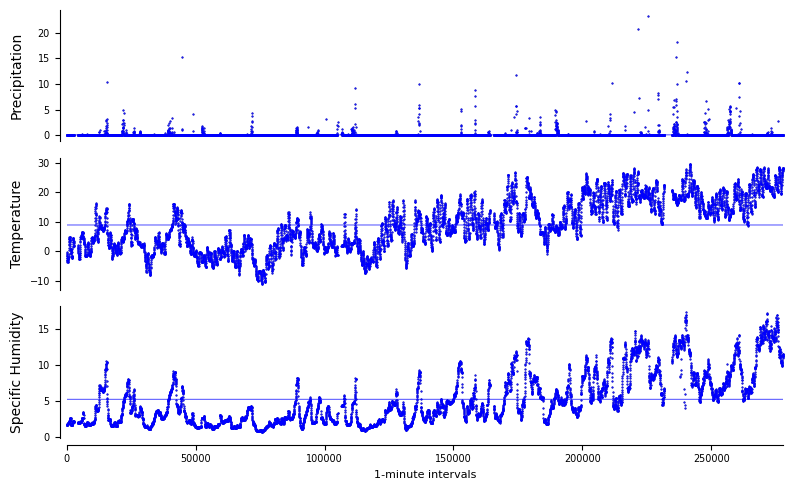

In [17]:
fig, axes = tp.plot_timeseries(dataframe=dataframe, 
                               color='blue',
                               figsize=(8, 5),
                               grey_masked_samples='data',
                               show_meanline=True,
                               adjust_plot=True,
                               tick_label_size=7,
                               label_fontsize=8,
                               time_label='1-minute intervals',)

# Change font size of y-labels
for ax in axes:
    ax.set_ylabel(ax.get_ylabel(), fontsize=10)  

# Align y-axis labels
fig.align_ylabels(axes)
plt.show()

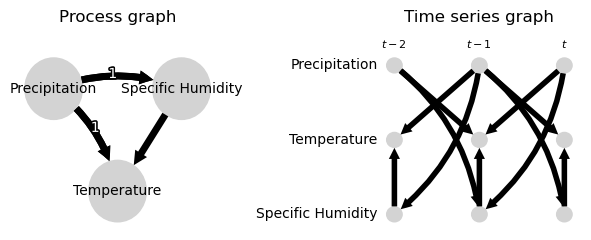

In [36]:

# 3 variables, tau_max = 2
graph = np.full((3, 3, 3), '', dtype='<U3')

graph[0, 2, 1]="-->"
graph[2, 0, 1]="<--"
graph[2, 1, 0]="-->"
graph[1, 2, 0]="<--"
graph[0, 1, 1]="-->"
graph[1, 0, 1]="<--"



# Positions of nodes for process graph
node_pos =  {
            'y': np.array([0.5, 0., 0.5, 1.]),
            'x': np.array([0., 0.5, 1., .5])
            }

# Show both graphs next to each other
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(6, 2.5))

tp.plot_graph(
    fig_ax = (fig, axes[0]),
    graph = graph,
    node_pos=node_pos,
    arrow_linewidth=5,
    node_size=0.3,
    node_aspect=1.5,
    var_names=var_names,
    tick_label_size=6,
    )
axes[0].set_title('Process graph', pad=20)


tp.plot_time_series_graph(
    fig_ax = (fig, axes[1]),
    graph = graph,
    var_names=var_names,
    )
axes[1].set_title('Time series graph', pad=20)


fig.tight_layout()

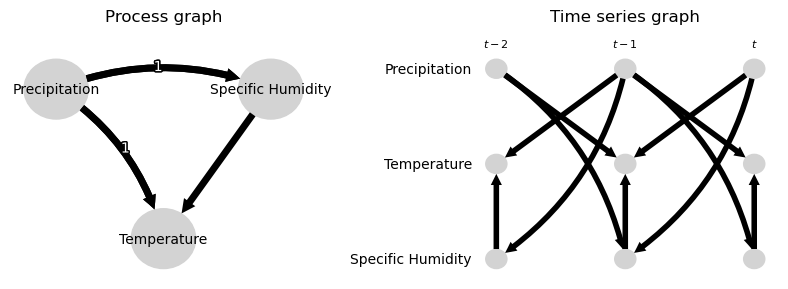

In [37]:

# # 3 variables, tau_max = 2
# graph = np.full((4, 4, 4), '', dtype='<U3')

# """ 
# Variables:
#         Precipitation[0]
#         Temperature[1]
#         Wetness[2]
#         Specific Humidity[3]
# """

# graph[0, 2, 0]="-->"
# graph[2, 0, 0]="<--"
# graph[0, 3, 1]="-->"
# graph[3, 0, 1]="<--"

# graph[2, 1, 0]="-->"
# graph[1, 2, 0]="<--"
# graph[0, 1, 1]="-->"
# graph[1, 0, 1]="<--"

# graph[3, 1, 0]="-->"
# graph[1, 3, 0]="<--"



# # Positions of nodes for process graph
# node_pos =  {
#             'y': np.array([0.5, 0., 0.5, 1.]),
#             'x': np.array([0., 0.5, 1., .5])
#             }

# var_names = ['Precipitation', 'Temperature', 'Specific Humidity']
# Show both graphs next to each other
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(8, 3))

tp.plot_graph(
    fig_ax = (fig, axes[0]),
    graph = graph,
    node_pos=node_pos,
    arrow_linewidth=5,
    node_size=0.2,
    node_aspect=1.5,
    var_names=var_names,
    tick_label_size=6,
    )
axes[0].set_title('Process graph', pad=20)

tp.plot_time_series_graph(
    fig_ax = (fig, axes[1]),
    graph = graph,
    var_names=var_names,
    )
axes[1].set_title('Time series graph', pad=20)

fig.tight_layout()

In [39]:
# Initialize Tigramite dataframe with mask, missing_flag is not needed here
dataframe = pp.DataFrame(data_array, var_names=var_names)
dataframe

In [40]:
print("dataframe.N =", dataframe.N)
print("dataframe.var_names =", dataframe.var_names)
print("data_array shape =", data_array.shape)

dataframe.N = 3
dataframe.var_names = ['Precipitation', 'Temperature', 'Specific Humidity']
data_array shape = (277891, 3)


X = [('Precipitation', 0)] -----> Y = [('Temperature', 0)]


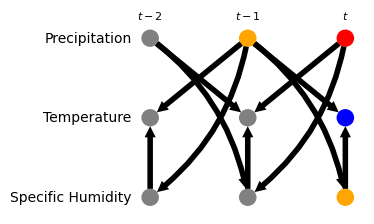

In [43]:
#Define cause X and effect Y

"""
#Precipitation
X = [(2, 0)]

#Temperature
Y = [(1, 0)]


# #Specific Humidity
# Z = [(2, 0)]
"""
""" 
Variables:
        Precipitation[0]
        Temperature[1]
        Wetness[2]
        Specific Humidity[3]
"""

#Precipitation
X = [(0, 0)]

#Temperature
Y = [(1, 0)]




# Initialize class with stationary directed acyclic graph (DAG) defined above
causal_effects = CausalEffects(graph, 
                               graph_type='stationary_dag', 
                               X=X, 
                               Y=Y, 
                               S=None,  # S could be a modulating variable to estimate conditional causal effects
                               verbosity=0)

print("X = %s -----> Y = %s" % (str([(var_names[var[0]], var[1]) for var in X]), str([(var_names[var[0]], var[1]) for var in Y])))

# Get optimal adjustment set
opt = causal_effects.get_optimal_set()

if opt is False: print("NOT IDENTIFIABLE!")
#print("Oset = ", [(var_names[v[0]], v[1]) for v in opt])
# Optionally check whether here an optimal adjustment set exists 
# in the sense that it has the smallest asymptotic variance among all adjustment sets (see [Runge 2021](https://arxiv.org/abs/2102.10324))
# print("Optimality = %s" %str(causal_effects.check_optimality()))

# Color nodes
special_nodes = {}
for node in opt:
    special_nodes[node] = 'orange'
for node in causal_effects.M:
    special_nodes[node] = 'lightblue'
for node in causal_effects.X:
    special_nodes[node] = 'red'
for node in causal_effects.Y:
    special_nodes[node] = 'blue'
    
fig, ax = tp.plot_time_series_graph(
        graph = graph,
        special_nodes=special_nodes,
        var_names=var_names,
        figsize=(3, 2.5),
        )
#plt.tight_layout()

In [44]:
# Optional data transform
data_transform = None  # sklearn.preprocessing.StandardScaler()

# Confidence interval range
conf_lev = 0.9

# Fit causal effect model from observational data
causal_effects.fit_total_effect(
    dataframe=dataframe, 
    mask_type=None,
    estimator=LinearRegression(),
    data_transform=data_transform,
    )


# Fit bootstrap causal effect model
causal_effects.fit_bootstrap_of(
    method='fit_total_effect',
    method_args={'dataframe':dataframe,  
    'mask_type':'y',
    'estimator':LinearRegression(),
    'data_transform':data_transform,
    },
    seed=4
    )


# Define interventions
dox_vals = np.linspace(0., 1., 2)

# Predict effect of interventions do(X=0.), ..., do(X=1.) in one go
intervention_data = np.repeat(dox_vals.reshape(len(dox_vals), 1), axis=1, repeats=len(X))
pred_Y = causal_effects.predict_total_effect( 
        intervention_data=intervention_data)

# Bootstrap: Predict effect of interventions do(X=0.), ..., do(X=1.) in one go
intervention_data = np.repeat(dox_vals.reshape(len(dox_vals), 1), axis=1, repeats=len(X))
conf = causal_effects.predict_bootstrap_of(
    method='predict_total_effect',
    method_args={'intervention_data':intervention_data},
    conf_lev=conf_lev)

print("Total effect via adjustment = %.2f [%.2f, %.2f]"
        %(pred_Y[1]-pred_Y[0], conf[0,1]-conf[0,0], conf[1,1]-conf[1,0])) 


AttributeError: 'CausalEffects' object has no attribute 'model'

In [45]:
def get_path_effect(graph, X, Y, mediation=None, conf_lev=0.9):
    causal_effects = CausalEffects(graph, graph_type='stationary_dag', 
                                    X=X, Y=Y, 
                                   S=None, 
                                   verbosity=0)
    
    dox_vals = np.linspace(0., 1., 2)

    # Fit causal effect model from observational data
    causal_effects.fit_wright_effect(
        dataframe=dataframe, 
        mask_type='y',
        mediation=mediation, #'direct',
        method = 'parents',
        data_transform=data_transform, #sklearn.preprocessing.StandardScaler(),
        )

    # Predict effect of interventions do(X=0.), ..., do(X=1.) in one go
    intervention_data = np.repeat(dox_vals.reshape(len(dox_vals), 1), axis=1, repeats=len(X))
    pred_Y = causal_effects.predict_wright_effect( 
            intervention_data=intervention_data)

    # Fit causal effect model from observational data
    causal_effects.fit_bootstrap_of(
        method='fit_wright_effect',
        method_args={'dataframe':dataframe,  
        'mask_type':'y',
        'mediation':mediation, #'direct',
        'data_transform':data_transform,
        },
        seed=42
        )

    # Predict effect of interventions do(X=0.), ..., do(X=1.) in one go
    intervention_data = np.repeat(dox_vals.reshape(len(dox_vals), 1), axis=1, repeats=len(X))
    conf = causal_effects.predict_bootstrap_of(
        method='predict_wright_effect',
        method_args={'intervention_data':intervention_data},
        conf_lev=conf_lev)

    print("Wright's path effect    = %.2f [%.2f, %.2f]"
                %(pred_Y[1], conf[0,1], conf[1,1]))


In [46]:
get_path_effect(graph, X=X, Y=Y, mediation=None, conf_lev=0.9)

AttributeError: 'CausalEffects' object has no attribute 'model'

# Linear Mediation Analysis

In [474]:
#Precipitation
# X = [(0, 0)]

# #Temperature
# Y = [(1, 0)]

# #Specific Humidity
# Z =[(2,0)]


get_path_effect(graph, X=X, Y=Y, mediation=Z, conf_lev=0.9)

AttributeError: 'CausalEffects' object has no attribute 'model'

In [380]:
get_path_effect(graph, X=X, Y=Y, mediation='direct', conf_lev=0.9)

Wright's path effect    = -0.18 [-0.24, -0.15]


/var/folders/j5/0j3xm4fn1qj5_2y9vvy7j8p80000gn/T/ipykernel_51351/344232330.py:41: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Wright's path effect    = %.2f [%.2f, %.2f]"


In [381]:
parents = {}
for j in range(causal_effects.N):
    parents[j] = list(causal_effects._get_parents((j, 0)))
print(parents)

{0: [], 1: [(2, 0), (1, -1), (0, 0)], 2: [(2, -1), (0, 0)]}


In [385]:
med = LinearMediation(dataframe=dataframe,
                 data_transform=data_transform,
                 mask_type='y',)
med.fit_model(all_parents=parents, tau_max=graph.shape[2] - 1)
med.fit_model_bootstrap( 
            boot_blocklength=1,
            seed=4,
            boot_samples=200)

def get_linear_mediation_effect(i, j, tau, mediation=None, conf_lev=0.9):
    ce = med.get_ce(i=i, tau=tau,  j=j)
    ce_boots = med.get_bootstrap_of(function='get_ce', 
        function_args={'i':i, 'tau':tau,  'j':j}, conf_lev=0.9)
    # Get Causal effect and 90% confidence interval
    print(f"Effect of {i} on {j} with mediation = {mediation} is {ce:.2f} [{ce_boots[0]:.2f}, {ce_boots[1]:.2f}]")

In [391]:
get_linear_mediation_effect(i=0, j=2, tau=0, mediation=None, conf_lev=0.9)
get_linear_mediation_effect(i=0, j=2, tau=0, mediation=1, conf_lev=0.9)


Effect of 0 on 2 with mediation = None is 0.02 [-0.00, 0.05]
Effect of 0 on 2 with mediation = 1 is 0.02 [-0.00, 0.05]


In [629]:
def fit_predict_plot(X, Y, graph, dataframe, estimator, dox_vals,
                     data_transform=None, graph_type='stationary_dag', adjustment_set='optimal', 
                     confidence=False,
                     boot_samples=3,
                     seed=None,
                     fig_ax=None,
                     label=None,
                     figsize=(4, 3),
                     verbosity=0):

    causal_effects = CausalEffects(graph, 
                        graph_type='stationary_dag',
                        X=X, Y=Y, 
                       verbosity=verbosity)
    causal_effects.fit_total_effect(
        dataframe=dataframe, 
        mask_type='y',
        estimator=estimator,
        adjustment_set = adjustment_set,
        ignore_identifiability=True,
#         conditional_estimator=conditional_estimator,
        data_transform=data_transform
        )

    # Fit causal effect model from observational data
    if confidence:
        causal_effects.fit_bootstrap_of(
            method='fit_total_effect',
            method_args={'dataframe':dataframe,  
            'mask_type':'y',
            'estimator':estimator,
            'adjustment_set':adjustment_set,
            'ignore_identifiability':True,
#             'conditional_estimator':conditional_estimator,
            'data_transform':data_transform,
            },
            boot_samples=boot_samples,
            seed=seed,
            )


    # Predict effect of interventions do(X=0.), ..., do(X=1.) in one go
    intervention_values = np.repeat(dox_vals.reshape(len(dox_vals), 1), axis=1, repeats=len(X))
    estimated_causal_effects = causal_effects.predict_total_effect( 
            intervention_data=intervention_values,
            transform_interventions_and_prediction=True,
#             conditions_data=conditions_data
    )

        # # Predict effect of interventions do(X=0.), ..., do(X=1.) in one go
    if confidence:
        estimated_confidence_intervals = causal_effects.predict_bootstrap_of(
            method='predict_total_effect',
            method_args={'intervention_data':intervention_values,
                        'transform_interventions_and_prediction':True,
#                          'conditions_data':conditions_data
                        })

    if fig_ax is None:
        fig = plt.figure(figsize=figsize)
        ax = fig.add_subplot(111)
    else:
        fig, ax = fig_ax
    
    if confidence:
        ax.errorbar(intervention_values.flatten(), estimated_causal_effects.flatten(), 
                 np.abs(estimated_confidence_intervals - estimated_causal_effects), 
                 alpha=1,
                 label=label,
                   )
    else:
        ax.plot(intervention_values, estimated_causal_effects, 
            alpha=1,
            label=label,
               )
    # ax.set_ylim(-0.25, 0.35)
    ax.grid(lw=0.5)    
    ax.set_xlabel(r'Intervention value in $X$')
    ax.set_ylabel(r'Estimated effect on $Y$')
#     ax.legend(loc='best', fontsize=6)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


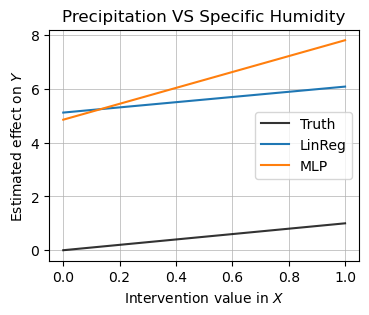

In [642]:
fig = plt.figure(figsize=(4, 3))
ax = fig.add_subplot(111)
fig_ax = (fig, ax)

X = [(0, -1)]
Y = [(3, 0)]

plt.title('Precipitation VS Specific Humidity')
# Ground truth
ax.plot(dox_vals, intervention_data.mean(axis=1), 
    alpha=0.8,
    color = 'black',
    linestyle='solid',
    label="Truth")

# Estimation using LinearRegression
fit_predict_plot(X=X, Y=Y, graph=graph, dataframe=dataframe, 
                 estimator=LinearRegression(), 
                 dox_vals=dox_vals,
                 data_transform=None, 
                 graph_type='stationary_dag', 
                 adjustment_set='optimal', 
                 confidence=False,
                 seed=4,
                 label='LinReg',
                 fig_ax = fig_ax,
                 verbosity=0)

# Estimation using MLPRegressor
fit_predict_plot(X=X, Y=Y, graph=graph, dataframe=dataframe, 
                 estimator=MLPRegressor(random_state=2, max_iter=1000), 
                 dox_vals=dox_vals,
                 data_transform=None, 
                 graph_type='stationary_dag', 
                 adjustment_set='optimal', 
                 confidence=False,
                 seed=4,
                 label='MLP',
                 fig_ax = fig_ax,
                 verbosity=0)


ax.legend(loc='best', fontsize=10)

In [622]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from scipy.stats import gaussian_kde